In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#from sys import argv

In [2]:
pd.set_option('display.max_columns', None)

# Load data:

In [3]:
##df_dups_raw = pd.read_csv('../dataset3/data_main/DUPS_22_03/data_DUPS.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate
df_dups_raw = pd.read_csv('../dataset3/data_main/DUPS_12_04/data_DUPS.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate
#df_dups_raw = pd.read_csv('./dataset3/data_main/data_DUPS_test.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate

In [4]:
df_dups = df_dups_raw.copy()
display(df_dups.head())
print(df_dups.shape) #(2159, 43)

,CNV_ID,regionA_stat,regionA_end,chr_A,regionB_stat,regionB_end,chr_B,A_size_bp,B_size_bp,A_size,B_size,libraries,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
0,DGRC_DUP_104,89775451.0,89777272.0,2,89779566.0,89781388.0,2,1821.0,1822.0,0.000790,0.000791,liGS,Rep_Simple_repeat,(TTCCATTCGA)n,Simple_repeat,Rep_Simple_repeat,(TTCCATTCGA)n,Simple_repeat,0.00044,0.001165,0.000000,0.000000,0.001305,0.029602,0.000000,0.0,False,0.479807,1.957921,0.003463,0.003567,0.099249,0.090253,0.0,0.0,0.0,0.0,0.922579,0.922579,0.003180,0.163358,0.449548,0.040844,True
1,DGRC_DUP_105,18786308.0,18789362.0,13,18799805.0,18802076.0,13,3054.0,2271.0,0.001324,0.000985,liGS,MSTA-int,ERVL-MaLR,Rep_LTR,THE1D-int,ERVL-MaLR,Rep_LTR,0.00000,0.000000,0.949902,0.971819,0.000000,0.064123,0.983628,0.0,False,0.000000,1.296145,0.004601,0.004765,0.100261,0.104939,0.0,0.0,0.0,0.0,0.914614,0.914614,0.025563,0.030514,0.088600,0.224772,True
2,DGRC_DUP_109,116414982.0,116416667.0,12,116420997.0,116422113.0,12,1685.0,1116.0,0.000731,0.000484,liGS,(GT)n,Simple_repeat,Rep_Simple_repeat,MLT1N2,ERVL-MaLR,Rep_LTR,0.00000,0.000000,0.541840,0.858423,0.453246,0.861636,0.000000,0.0,False,1.900995,1.251473,0.005071,0.004170,0.029586,0.084483,0.0,0.0,0.0,0.0,0.929569,0.929569,0.055684,0.035941,0.162858,0.240022,True
3,DGRC_DUP_112,54759916.0,54759960.0,19,54835750.0,54836177.0,19,44.0,427.0,0.000019,0.000185,liGS,HAL1b,L1,Rep_LINE,Rep_LTR,MLT1D,ERVL-MaLR,0.00000,0.000038,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,True,1.441851,0.678649,0.004222,0.005517,0.111111,0.000000,0.0,1.0,0.0,1.0,0.892925,0.894511,0.090833,0.042685,0.107181,0.080563,True
4,DGRC_DUP_115,13872326.0,13872640.0,21,13898783.0,13899030.0,21,314.0,247.0,0.000136,0.000107,liGS,THE1D-int,ERVL-MaLR,Rep_LTR,MSTA-int,ERVL-MaLR,Rep_LTR,0.00000,0.000000,1.000000,1.000000,0.000000,0.002331,1.000000,0.0,False,0.272381,1.528929,0.005111,0.004840,0.111111,0.111111,0.0,0.0,0.0,0.0,0.905155,0.903528,0.019801,0.016315,0.223321,0.425040,True


(10575, 44)


---

### Check mean and std of region A and B size in bps:

In [5]:
df_Dongs = df_dups.loc[(df_dups['CNV_ID'].str.contains('NYGC'))]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]
df_DGRC = df_dups.loc[~(df_dups['CNV_ID'].str.contains('NYGC'))&(df_dups['libraries']=='liGS')]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]

In [6]:
#Save Dongs deletions for further test:

df_Dongs.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

df_Dongs['sD_pair'] = df_Dongs['sD_pair'].astype(int)
#
print(df_Dongs["target"].value_counts())
#Save it:
outPATH = "../dataset3/data_main/DUPS_12_04/"
df_Dongs.to_csv(outPATH + 'refined_data_DUPS_Dongs-13-04.csv', sep = ';' ,index_label=False)

True    9797
Name: target, dtype: int64


---

In [7]:
df_DGRC["target"].value_counts()

False    581
True     197
Name: target, dtype: int64

In [8]:
pd.concat([df_DGRC['A_size_bp'],df_DGRC['B_size_bp']]).describe()

count     1556.000000
mean      2856.561054
std       3285.697184
min          3.000000
25%        636.500000
50%       2013.000000
75%       3772.750000
max      32249.000000
dtype: float64

In [32]:
#pd.concat([df_Dongs['A_size_bp'],df_Dongs['B_size_bp']]).describe()

---

In [33]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      394.000000
mean      3189.032995
std       2445.277425
min          3.000000
25%       1751.250000
50%       2867.000000
75%       3918.250000
max      17741.000000
dtype: float64

In [34]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1162.000000
mean      2743.829604
std       3519.266812
min          3.000000
25%        529.500000
50%       1507.500000
75%       3645.250000
max      32249.000000
dtype: float64

In [35]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      197.000000
mean      3153.060914
std       2431.140571
min         10.000000
25%       1679.000000
50%       2816.000000
75%       3880.000000
max      17741.000000
Name: A_size_bp, dtype: float64

In [36]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count      581.000000
mean      2751.557659
std       3555.057594
min          4.000000
25%        536.000000
50%       1577.000000
75%       3605.000000
max      32249.000000
Name: A_size_bp, dtype: float64

In [37]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      197.000000
mean      3225.005076
std       2464.999951
min          3.000000
25%       1889.000000
50%       2901.000000
75%       4008.000000
max      17685.000000
Name: B_size_bp, dtype: float64

In [38]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count      581.000000
mean      2736.101549
std       3486.155117
min          3.000000
25%        519.000000
50%       1494.000000
75%       3771.000000
max      24684.000000
Name: B_size_bp, dtype: float64

---

In [39]:
df_DGRC.isnull().values.any()

False

In [40]:
df_dups = df_DGRC

---

df_dups[['A_size_bp','B_size_bp','libraries']].loc[(df_dups['target']==True)&(df_dups['libraries']=='liGS')].head(3)

df_dups[['A_size_bp','B_size_bp']].loc[(df_dups['target']==True)&(df_dups['libraries']=='liGS')].shape

df_dups[['A_size_bp','B_size_bp']].loc[(df_dups['target']==True)&(df_dups['libraries']=='liGS')].describe()

#Checking liGS mead region A and B size for Dongs data , in analisis...
l_A = df_dups['A_size_bp'].loc[df_dups['libraries']=='liGS'].tolist()
l_B = df_dups['B_size_bp'].loc[df_dups['libraries']=='liGS'].tolist()
l_A.extend(l_B)

print(np.mean(l_A)) #2857

---

In [15]:
df_Dongs.shape

(9797, 35)

In [13]:
df_Dongs.loc[(df_Dongs['A_Lamina_score'] == 0) | (df_Dongs['B_Lamina_score'] == 0)]

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3619,NYGC_DUP_TAN_50,0.001381,0.001381,MER91A,hAT-Tip100,Rep_DNA,L1MA5A,L1,Rep_LINE,0.0,0.0,0.065934,0.293878,0.165233,0.068509,0.000000,0.0,0,1.945061,0.179069,0.003524,0.003473,0.000492,0.009962,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.083183,0.383033,0.049342,0.546209,True
3669,NYGC_DUP_TAN_100,0.001381,0.001381,L1MEg,L1,Rep_LINE,MLT1F,ERVL-MaLR,Rep_LTR,0.0,0.0,0.448666,0.286342,0.111271,0.114293,0.000000,0.0,0,1.768939,0.112301,0.005025,0.005586,0.025224,0.011908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001403,0.000516,0.115642,0.182042,True
3694,NYGC_DUP_TAN_125,0.001381,0.001381,AluSx3,Alu,Rep_SINE,L2a,L2,Rep_LINE,0.0,0.0,0.081319,0.769545,0.052752,0.381802,0.000000,0.0,0,2.008475,1.377839,0.003555,0.004420,0.001265,0.066620,0.209733,0.252433,0.000000,0.000000,0.000000,0.000000,0.002939,0.002530,0.222859,0.018209,True
3695,NYGC_DUP_TAN_126,0.001381,0.001381,L1MA5,L1,Rep_LINE,L1MA5,L1,Rep_LINE,0.0,0.0,0.529042,0.464678,0.680520,0.383032,0.000000,0.0,0,2.038476,1.219550,0.003702,0.003621,0.032083,0.024992,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000649,0.095501,0.018562,0.299344,True
3701,NYGC_DUP_TAN_132,0.001381,0.001381,Tigger17a,TcMar-Tigger,Rep_DNA,Tigger17a,TcMar-Tigger,Rep_DNA,0.0,0.0,0.816641,0.831083,0.400494,0.135193,0.000000,0.0,0,1.966341,1.138036,0.004266,0.004326,0.074111,0.082420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.018351,0.017884,0.231088,0.006896,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13390,NYGC_DUP_REV2_9821,0.001381,0.001381,L2a,L2,Rep_LINE,MER4C,ERV1,Rep_LTR,0.0,0.0,0.279749,0.850235,290.956983,0.137384,0.000000,0.0,0,1.524878,0.117412,0.003577,0.004289,0.008906,0.082000,0.174882,0.825118,0.000000,0.000000,0.000000,0.736241,0.047765,0.016787,0.120714,0.284912,True
13410,NYGC_DUP_REV2_9841,0.001381,0.001381,MER67C,ERV1,Rep_LTR,HERVL-int,ERVL,Rep_LTR,0.0,0.0,0.553532,0.682261,0.196290,0.051680,0.000000,0.0,0,2.073880,0.850223,0.003868,0.004339,0.034023,0.058107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048777,0.011556,0.466013,0.070655,True
13411,NYGC_DUP_REV2_9842,0.001381,0.001381,L2c,L2,Rep_LINE,AluSx,Alu,Rep_SINE,0.0,0.0,0.638305,0.094819,0.000000,0.044982,1.000000,0.0,0,1.771514,0.043546,0.003392,0.004009,0.051355,0.001032,0.000000,0.000000,0.820722,0.179278,0.980892,0.000000,290.956983,0.005999,0.015136,0.315984,True
13412,NYGC_DUP_REV2_9843,0.001381,0.001381,LTR28C,ERV1,Rep_LTR,AluSz,Alu,Rep_SINE,0.0,0.0,0.466248,0.545369,0.000000,0.000000,0.745997,1.0,0,1.921743,1.625664,0.004612,0.004533,0.024269,0.033027,0.087284,0.912716,0.224490,0.775510,0.000000,0.940397,0.046936,0.016838,0.021520,0.036512,True


In [16]:
9797 - 239

9558

In [18]:
(239 *100)/(9797)

2.4395223027457384

---

In [41]:
#display(df_dups.loc[df_dups['target']==True].shape)
#display(df_dups.loc[df_dups['target']==False].shape)

In [42]:
df_dups.drop(['regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

In [43]:
#display(df_dups.head())
#print(df_dups.shape)

# Start Feature Seletion:

Some adjustments to target:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [44]:
df_dups["target"] = df_dups["target"].replace({True:0,False:1})
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [45]:
df_dups

,CNV_ID,A_size,B_size,libraries,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
0,DGRC_DUP_104,0.000790,0.000791,liGS,Rep_Simple_repeat,(TTCCATTCGA)n,Simple_repeat,Rep_Simple_repeat,(TTCCATTCGA)n,Simple_repeat,0.00044,0.001165,0.000000,0.000000,0.001305,0.029602,0.000000,0.0,False,0.479807,1.957921,0.003463,0.003567,0.099249,0.090253,0.0,0.0,0.000000,0.000000,0.922579,0.922579,0.003180,0.163358,0.449548,0.040844,0
1,DGRC_DUP_105,0.001324,0.000985,liGS,MSTA-int,ERVL-MaLR,Rep_LTR,THE1D-int,ERVL-MaLR,Rep_LTR,0.00000,0.000000,0.949902,0.971819,0.000000,0.064123,0.983628,0.0,False,0.000000,1.296145,0.004601,0.004765,0.100261,0.104939,0.0,0.0,0.000000,0.000000,0.914614,0.914614,0.025563,0.030514,0.088600,0.224772,0
2,DGRC_DUP_109,0.000731,0.000484,liGS,(GT)n,Simple_repeat,Rep_Simple_repeat,MLT1N2,ERVL-MaLR,Rep_LTR,0.00000,0.000000,0.541840,0.858423,0.453246,0.861636,0.000000,0.0,False,1.900995,1.251473,0.005071,0.004170,0.029586,0.084483,0.0,0.0,0.000000,0.000000,0.929569,0.929569,0.055684,0.035941,0.162858,0.240022,0
3,DGRC_DUP_112,0.000019,0.000185,liGS,HAL1b,L1,Rep_LINE,Rep_LTR,MLT1D,ERVL-MaLR,0.00000,0.000038,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,True,1.441851,0.678649,0.004222,0.005517,0.111111,0.000000,0.0,1.0,0.000000,1.000000,0.892925,0.894511,0.090833,0.042685,0.107181,0.080563,0
4,DGRC_DUP_115,0.000136,0.000107,liGS,THE1D-int,ERVL-MaLR,Rep_LTR,MSTA-int,ERVL-MaLR,Rep_LTR,0.00000,0.000000,1.000000,1.000000,0.000000,0.002331,1.000000,0.0,False,0.272381,1.528929,0.005111,0.004840,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.905155,0.903528,0.019801,0.016315,0.223321,0.425040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,fp_dup_584,0.000212,0.000074,liGS,ALR/Alpha,centr,Rep_Satellite,ALR/Alpha,centr,Rep_Satellite,0.00000,0.000000,1.000000,1.000000,0.025431,0.074438,0.000000,0.0,False,0.000000,1.490429,0.003735,0.003647,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.928571,0.928571,0.027120,0.077288,0.347034,0.306890,1
783,fp_dup_585,0.000376,0.000576,liGS,(AC)n,Simple_repeat,Rep_Simple_repeat,L1MC1,L1,Rep_LINE,0.00000,0.000000,0.188222,0.623494,0.000000,0.000000,0.774827,1.0,False,0.000000,1.483477,0.003529,0.003812,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.939334,0.917422,0.009160,0.011506,0.238623,0.390908,1
784,fp_dup_586,0.000230,0.000039,liGS,ALR/Alpha,centr,Rep_Satellite,ALR/Alpha,centr,Rep_Satellite,0.00000,0.000000,1.000000,1.000000,0.000000,0.004211,1.000000,0.0,False,0.000000,1.481077,0.003514,0.003474,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.936896,0.937135,0.080549,0.009430,0.194369,0.186907,1
785,fp_dup_587,0.000323,0.000449,liGS,L2a,L2,Rep_LINE,Rep_LINE,L2b,L2,0.00000,0.000125,0.053691,0.000000,0.009500,0.002151,0.000000,0.0,False,0.774524,1.468508,0.003839,0.005442,0.000743,0.000041,0.0,0.0,0.366538,0.109284,0.879131,0.884993,0.051761,0.045604,0.012878,0.236137,1


In [46]:
#DEBUG
df_dups['libraries'].unique()

array(['liGS'], dtype=object)

In [47]:
df_dups.drop(['libraries'], axis=1, inplace=True)

## Check for outliers:

def look_for_outliers(dataframe):
    """
    """
    target = dataframe.columns[-1]
    #display(dataframe[target])
    cols = dataframe.drop(["CNV_ID"], axis=1).columns
    for var in cols:
        data = pd.concat([dataframe[target], dataframe[var]], axis=1)
        data.plot.scatter(x=var, y=target, ylim=(-1,3), xlim=(dataframe[var].min(),dataframe[var].max()),figsize=(26, 4))

    

#look_for_outliers(df_dups)

In [48]:
#look_for_outliers(df_dups)

## PCA:

In [49]:
#prepdata:
df_dups_PCA = df_dups.copy()
df_dups_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = df_dups_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#df_dups_PCA[['sD_pair_A','sD_pair_B']] = df_dups_PCA[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
df_dups_PCA['sD_pair'] = df_dups_PCA['sD_pair'].astype(int)

##df_dups_PCA[['libraries']] = df_dups_PCA[['libraries']].stack().rank(method='dense').unstack()
df_dups_PCA

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
0,DGRC_DUP_104,0.000790,0.000791,359.0,48.0,368.0,359.0,48.0,368.0,0.00044,0.001165,0.000000,0.000000,0.001305,0.029602,0.000000,0.0,0,0.479807,1.957921,0.003463,0.003567,0.099249,0.090253,0.0,0.0,0.000000,0.000000,0.922579,0.922579,0.003180,0.163358,0.449548,0.040844,0
1,DGRC_DUP_105,0.001324,0.000985,337.0,98.0,354.0,373.0,98.0,354.0,0.00000,0.000000,0.949902,0.971819,0.000000,0.064123,0.983628,0.0,0,0.000000,1.296145,0.004601,0.004765,0.100261,0.104939,0.0,0.0,0.000000,0.000000,0.914614,0.914614,0.025563,0.030514,0.088600,0.224772,0
2,DGRC_DUP_109,0.000731,0.000484,32.0,368.0,359.0,332.0,98.0,354.0,0.00000,0.000000,0.541840,0.858423,0.453246,0.861636,0.000000,0.0,0,1.900995,1.251473,0.005071,0.004170,0.029586,0.084483,0.0,0.0,0.000000,0.000000,0.929569,0.929569,0.055684,0.035941,0.162858,0.240022,0
3,DGRC_DUP_112,0.000019,0.000185,106.0,124.0,353.0,354.0,317.0,98.0,0.00000,0.000038,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1,1.441851,0.678649,0.004222,0.005517,0.111111,0.000000,0.0,1.0,0.000000,1.000000,0.892925,0.894511,0.090833,0.042685,0.107181,0.080563,0
4,DGRC_DUP_115,0.000136,0.000107,373.0,98.0,354.0,337.0,98.0,354.0,0.00000,0.000000,1.000000,1.000000,0.000000,0.002331,1.000000,0.0,0,0.272381,1.528929,0.005111,0.004840,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.905155,0.903528,0.019801,0.016315,0.223321,0.425040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,fp_dup_584,0.000212,0.000074,52.0,389.0,358.0,52.0,389.0,358.0,0.00000,0.000000,1.000000,1.000000,0.025431,0.074438,0.000000,0.0,0,0.000000,1.490429,0.003735,0.003647,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.928571,0.928571,0.027120,0.077288,0.347034,0.306890,1
783,fp_dup_585,0.000376,0.000576,5.0,368.0,359.0,152.0,124.0,353.0,0.00000,0.000000,0.188222,0.623494,0.000000,0.000000,0.774827,1.0,0,0.000000,1.483477,0.003529,0.003812,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.939334,0.917422,0.009160,0.011506,0.238623,0.390908,1
784,fp_dup_586,0.000230,0.000039,52.0,389.0,358.0,52.0,389.0,358.0,0.00000,0.000000,1.000000,1.000000,0.000000,0.004211,1.000000,0.0,0,0.000000,1.481077,0.003514,0.003474,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.936896,0.937135,0.080549,0.009430,0.194369,0.186907,1
785,fp_dup_587,0.000323,0.000449,208.0,206.0,353.0,353.0,209.0,206.0,0.00000,0.000125,0.053691,0.000000,0.009500,0.002151,0.000000,0.0,0,0.774524,1.468508,0.003839,0.005442,0.000743,0.000041,0.0,0.0,0.366538,0.109284,0.879131,0.884993,0.051761,0.045604,0.012878,0.236137,1


In [50]:
#------------------

#prepdata:
df_dups_PCA = df_dups.copy()
df_dups_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = df_dups_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
df_dups_PCA[['sD_pair_A','sD_pair_B']] = df_dups_PCA[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
df_dups_PCA

In [51]:
#Save it:
outPATH = "./datasetPCA/duplications/"
df_dups_PCA.to_csv(outPATH + 'dup_PCA_liGS.csv', sep = ';' ,index_label=False)

In [52]:
#/

In [53]:
from sklearn.decomposition import PCA

## TRUE

In [54]:
X = df_dups.loc[df_dups["target"] == 0]
y =  df_dups["target"].loc[df_dups["target"] == 0]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
#X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair_A','sD_pair_B']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
##X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

##X[['libraries']] = X[['libraries']].stack().rank(method='dense').unstack() #V3
# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(197, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

In [55]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.03811736, -0.02051949, -0.14039677, -0.13437536,  0.23316544,
         0.21867689,  0.26486139, -0.01426793, -0.24610041, -0.24026936,
        -0.11084442,  0.24118896, -0.34758773, -0.31014257,  0.18136068,
         0.14543532, -0.19115314, -0.10630091, -0.15956109, -0.13161468,
        -0.00773549, -0.02205919,  0.31399738,  0.26064101,  0.23044106,
         0.1312092 ],
       [-0.435319  , -0.40980449,  0.27382203,  0.33969517, -0.02397993,
        -0.19991322,  0.12866981,  0.11339596, -0.22800377, -0.2022342 ,
         0.15565894, -0.25932432,  0.09719922,  0.08866765,  0.14210999,
        -0.01646746, -0.04052333, -0.07146037, -0.09208883,  0.03401551,
        -0.23821217, -0.267275  ,  0.0724311 ,  0.04355428,  0.0914842 ,
         0.00353322]])

Text(0, 0.5, 'pc2')

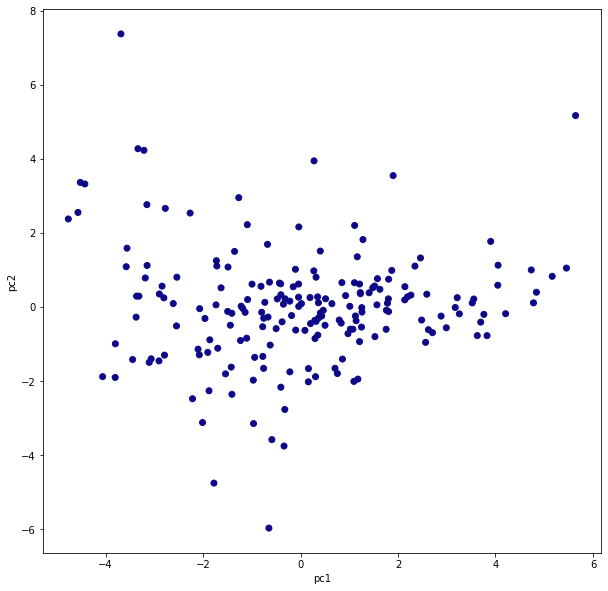

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

## FALSE

In [57]:
X = df_dups.loc[df_dups["target"] == 1]
y =  df_dups["target"].loc[df_dups["target"] == 1]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
#X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair_A','sD_pair_B']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

##X[['libraries']] = X[['libraries']].stack().rank(method='dense').unstack() #V3
# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(581, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

Text(0, 0.5, 'pc2')

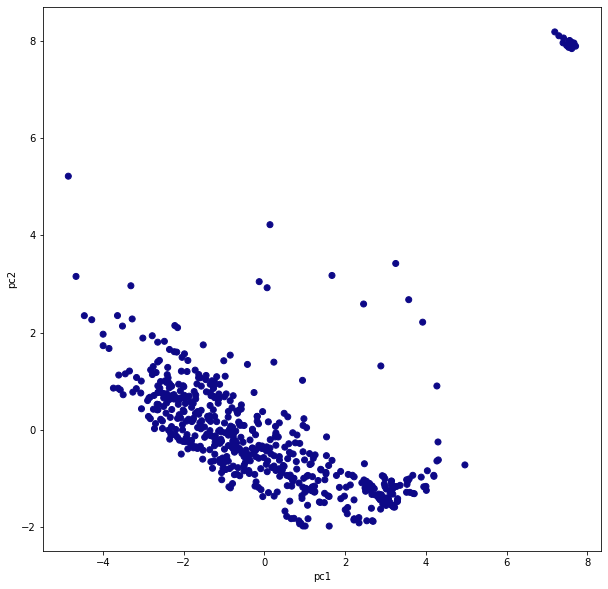

In [58]:
#1
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [59]:
# old dataset

### Using PCA R script:

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 

TP duplications:

In [62]:
Image(url= "./datasetPCA/duplications/tp_scaled.png")

In [63]:
Image(url= "./datasetPCA/duplications/tp_labels.png") #old

FP duplications:

In [64]:
Image(url= "./datasetPCA/duplications/fp_scaled.png")

In [65]:
Image(url= "./datasetPCA/duplications/fp_labels.png") #unscaled

# Remove outliers:

In [66]:
Image(url= "./datasetPCA/duplications/tp_scaled_dots.png")

In [67]:
Image(url= "./datasetPCA/duplications/tp_labels_marked.png")#

In [68]:
#________________________________

In [69]:
Image(url= "./datasetPCA/duplications/fp_scaled_dots.png")

In [70]:
Image(url= "./datasetPCA/duplications/fp_labels_marked.png")

In [71]:
#Outliers to remove:
l_outliersIDs = ["DGRC_DUP_213",
                "fp_dup_118"]

#df_dups[df_dups['CNV_ID'].isin(l_outliersIDs)]

l_outliersIDs = ["DGRC_DUP_274","DGRC_DUP_222",
                "fp_dup_118"]

In [72]:
df_dups = df_dups[~df_dups['CNV_ID'].isin(l_outliersIDs)]

# Save current dataset:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [73]:
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})
df_dups["target"] = df_dups["target"].replace({0:True,1:False}) #resverse it
#df_dups["target"] = df_dups["target"].astype(int)
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [37]:
#df_dups.loc[df_dups.target==1].head(1)

In [38]:
#df_dups.loc[df_dups.target==0].head(1)

***

In [39]:
#df_dups["target"] = df_dups["target"].astype(int)

In [40]:
#df_dups[['CNV_ID','target']].loc[df_dups.target==1].head(1)

In [41]:
#df_dups[['CNV_ID','target']].loc[df_dups.target==0].head(1)

***

In [74]:
outPATH = "../dataset3/data_main/DUPS_12_04/"
df_dups.to_csv(outPATH + 'refined_data_DUPS_liGS.csv', sep = ';' ,index_label=False)

# ---------------------------------------------------------------------

# Feature Importance:

# see : https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0 A_size, Score: 0.05426
Feature: 1 B_size, Score: 0.06482
Feature: 2 A_region_name, Score: 0.03540
Feature: 3 A_region_family, Score: 0.01974
Feature: 4 A_region_class, Score: 0.01389
Feature: 5 B_region_name, Score: 0.03122
Feature: 6 B_region_family, Score: 0.02104
Feature: 7 B_region_class, Score: 0.01676
Feature: 8 A_repitiveRegion_dist, Score: 0.00489
Feature: 9 B_repitiveRegion_dist, Score: 0.00764
Feature: 10 A_cov_repRegion, Score: 0.02764
Feature: 11 B_cov_repRegion, Score: 0.03805
Feature: 12 A_SegDup_dist, Score: 0.04946
Feature: 13 B_SegDup_dist, Score: 0.03908
Feature: 14 A_cov_segDup, Score: 0.00972
Feature: 15 B_cov_segDup, Score: 0.01295
Feature: 16 sD_pair, Score: 0.00617
Feature: 17 dist_Centromere, Score: 0.06542
Feature: 18 dist_Telomere, Score: 0.03354
Feature: 19 GC_perc_A, Score: 0.03879
Feature: 20 GC_perc_B, Score: 0.05075
Feature: 21 Dust_A, Score: 0.02671
Feature: 22 Dust_B, Score: 0.03835
Feature: 23 A_cov_Exons, Score: 0.02307
Feature: 24 A_cov_In

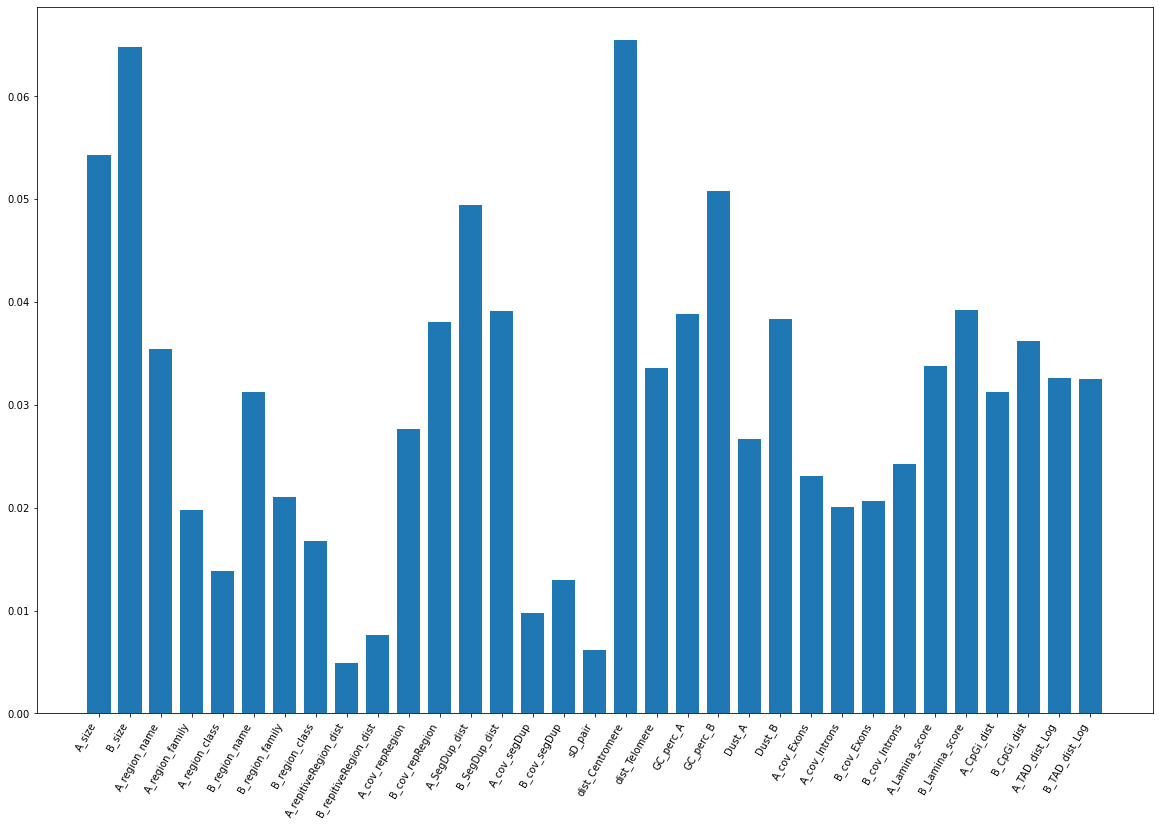

In [75]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = df_dups.drop(["target","CNV_ID"], axis = 1), df_dups["target"]

#Must adapt caregorical:
X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
X['sD_pair'] = X['sD_pair'].astype(int)
#X[['libraries']] = X[['libraries']].stack().rank(method='dense').unstack() #V3

##X = pd.get_dummies(X, columns=['libraries'])


list_features = X.columns.to_list()

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %s, Score: %.5f' % (i,list_features[i],v))
# plot feature importance
pyplot.figure(figsize=(20, 13))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=X.columns,width = 0.75 )
#pyplot.bar([x for x in range(list_features)], importance)
pyplot.xticks(rotation=60,horizontalalignment='right')
pyplot.rcParams.update({'font.size': 18})

pyplot.show()

---

---

---

---

### Check mean and std of region A and B size in bps:

In [78]:
df_DGRC = pd.read_csv('../dataset3/data_main/DUPS_12_04/data_DUPS.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate

In [79]:
df_DGRC = df_DGRC.loc[~(df_DGRC['CNV_ID'].str.contains('NYGC'))&(df_DGRC['libraries']=='liGS')]

In [80]:
df_DGRC["target"].value_counts()

False    581
True     197
Name: target, dtype: int64

In [81]:
#Outliers to decided to remove:
l_outliersIDs = ["DGRC_DUP_213",
                "fp_dup_118"]
#df_dels[df_dels['CNV_ID'].isin(l_outliersIDs)]
df_DGRC = df_DGRC[~df_DGRC['CNV_ID'].isin(l_outliersIDs)]

In [82]:
df_DGRC["target"].value_counts()

False    580
True     196
Name: target, dtype: int64

In [91]:
pd.concat([df_DGRC['A_size_bp'],df_DGRC['B_size_bp']]).describe()

count     1552.000000
mean      2860.783505
std       3288.745045
min          3.000000
25%        636.500000
50%       2018.500000
75%       3778.250000
max      32249.000000
dtype: float64

In [84]:
#pd.concat([df_Dongs['A_size_bp'],df_Dongs['B_size_bp']]).describe()

---

In [85]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      392.000000
mean      3200.926020
std       2445.491141
min          3.000000
25%       1795.500000
50%       2884.500000
75%       3921.500000
max      17741.000000
dtype: float64

In [86]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1160.000000
mean      2745.838793
std       3521.944961
min          3.000000
25%        529.000000
50%       1507.500000
75%       3648.750000
max      32249.000000
dtype: float64

In [ ]:
#A

In [87]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      196.000000
mean      3161.913265
std       2434.181083
min         10.000000
25%       1683.500000
50%       2824.500000
75%       3883.500000
max      17741.000000
Name: A_size_bp, dtype: float64

In [88]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count      580.000000
mean      2753.043103
std       3557.945800
min          4.000000
25%        534.750000
50%       1572.000000
75%       3611.250000
max      32249.000000
Name: A_size_bp, dtype: float64

In [ ]:
#B

In [89]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count      196.000000
mean      3239.938776
std       2462.361784
min          3.000000
25%       1909.250000
50%       2909.500000
75%       4011.500000
max      17685.000000
Name: B_size_bp, dtype: float64

In [90]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count      580.000000
mean      2738.634483
std       3488.629190
min          3.000000
25%        518.250000
50%       1494.500000
75%       3773.000000
max      24684.000000
Name: B_size_bp, dtype: float64

---